In [25]:
import pandas as pd
import numpy as np

In [26]:
s = pd.Series(data=[10, "11", ['a',12], 'ppp', 14, 42], # данные
              index=[2.1, '2', 'два', 2, 2.1, -2]) # их индексы
print(s[2]) # возращает элементы у которых индекс 2)
print(s['2']) # с названием '2'
print(s['два']) # 'два', там массив
print(s[-2]) # это ячейка с названием -2
a = s[2.1] # находит два индекса 

ppp
11
['a', 12]
42


In [27]:
v = pd.Series(data=[10, "11", ['a',12], 'ppp', 14], # данные
              index=['a', 'f', 'c', 'd', 'e']) # их индексы
v['a':'c'] # срез c индекса a по индекс c
print(v)

a         10
f         11
c    [a, 12]
d        ppp
e         14
dtype: object


In [28]:
# загрузка датасета
url = "S02-hw-dataset.csv"
df = pd.read_csv(url)
print(df.head(), "\n------------") #вывод первых 5 строк
print(df.info(), "\n------------") #общая информация об объекте
print(df.describe(), "\n------------") #вывод статистики

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296 
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None 
------------
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000  

In [29]:
df.isnull().sum() #пропуски в каждом столбце

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [30]:
df.duplicated().sum() #количество дубликатов

np.int64(1)

In [31]:
df.isna().mean() #доля пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [32]:
df[df.duplicated(keep=False)] #дублирующиеся строки

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [33]:
problems = {}
problems["invalid_user"] = df["user_id"].isna().sum()
#problems["null_age"] = df["age"].isna().sum()
problems["invalid_country"] = df["country"].isna().sum()
problems["invalid_age"] = ((df["age"] < 0) | (df["age"] > 110) | (df["age"].isna())).sum()
problems["invalid_revenue"] = ((df["revenue"] < 0) | (df["revenue"] > 1000000) | (df["revenue"].isna())).sum()
problems["invalid_wastes"] = ((df["revenue"] <= 0) & (df["purchases"] > 0)).sum()
problems["invalid_purchases"] = ((df["purchases"] < 0) | (df["purchases"].isna())).sum()
report = pd.Series(problems)
print(report)

invalid_user         0
invalid_country      0
invalid_age          3
invalid_revenue      0
invalid_wastes       1
invalid_purchases    1
dtype: int64


In [34]:
#подсчет частот по странам
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [35]:
#группировка по стране и году
df.groupby("country")["age"].agg(['mean','median'])

,mean,median
country,,
CN,24.000000,24.0
DE,34.600000,35.0
FR,46.250000,42.0
RU,30.076923,26.0
US,36.714286,39.0


In [36]:
#коридоры по возрасту
bins = [0, 10, 20, 30, 40, 50, 60, 80]
labels = ['0–10', '11–20', '21–30', '31–40', '40-50', '51-60', '61-80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_group'].value_counts()

age_group
21–30    12
31–40    11
40-50     6
51-60     6
11–20     2
0–10      1
61-80     0
Name: count, dtype: int64

In [37]:
import matplotlib.pyplot as plt

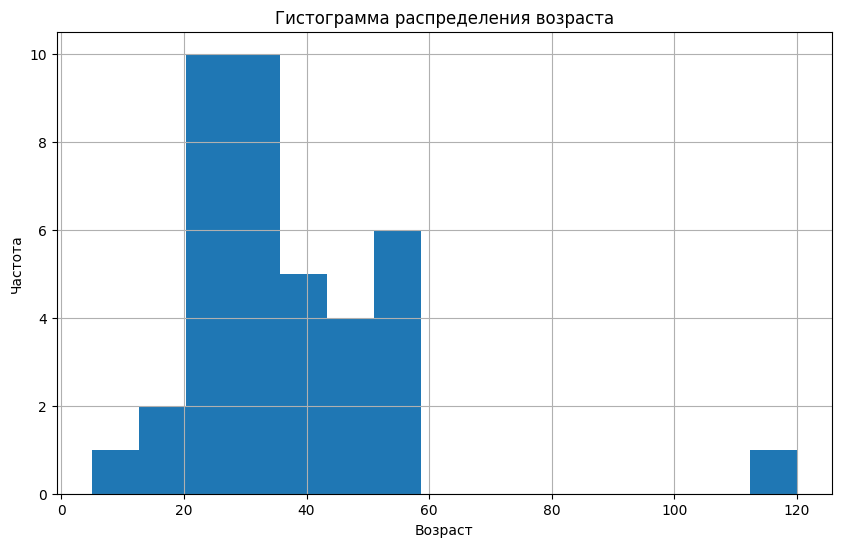

In [38]:
#plt.figure(figsize=(16, 5))
#df["age"].plot(kind="hist", bins=100)
#plt.title("Гистограмма распределения возраста")
#plt.xlabel("Возраст")
#plt.ylabel("Частота")
#plt.grid()
#plt.xticks(np.arange(0, 100, 100))

#plt.savefig("figures/hist_ages.png")
#plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=15)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Гистограмма распределения возраста')
plt.grid()

plt.savefig("figures/hist_ages.png")
plt.show()

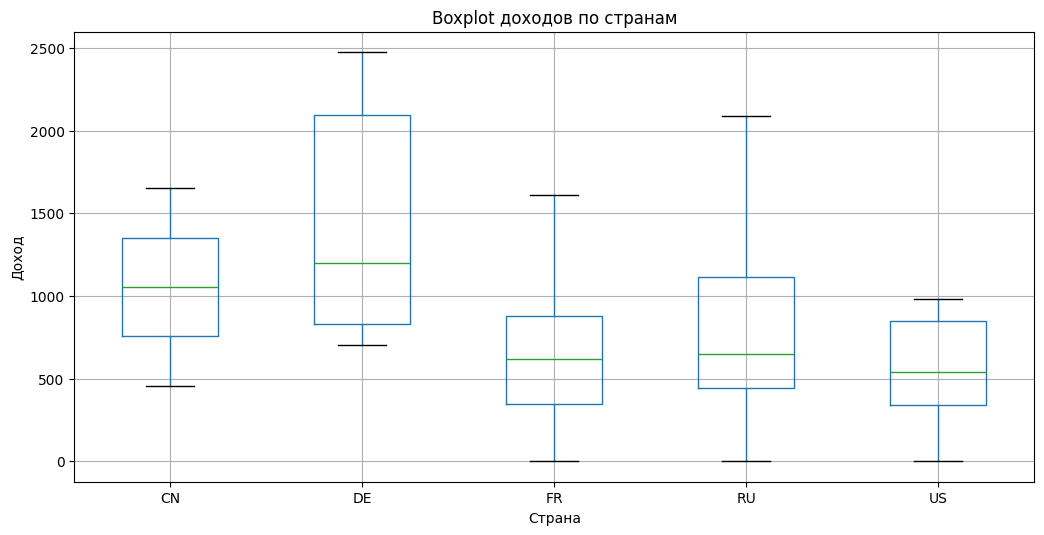

In [39]:
df.boxplot(column="revenue", by="country", figsize=(12, 6))

plt.title("Boxplot доходов по странам")
plt.suptitle("")
plt.xlabel("Страна")
plt.ylabel("Доход")

plt.savefig("figures/boxplot_revenue_country.png")
plt.show()

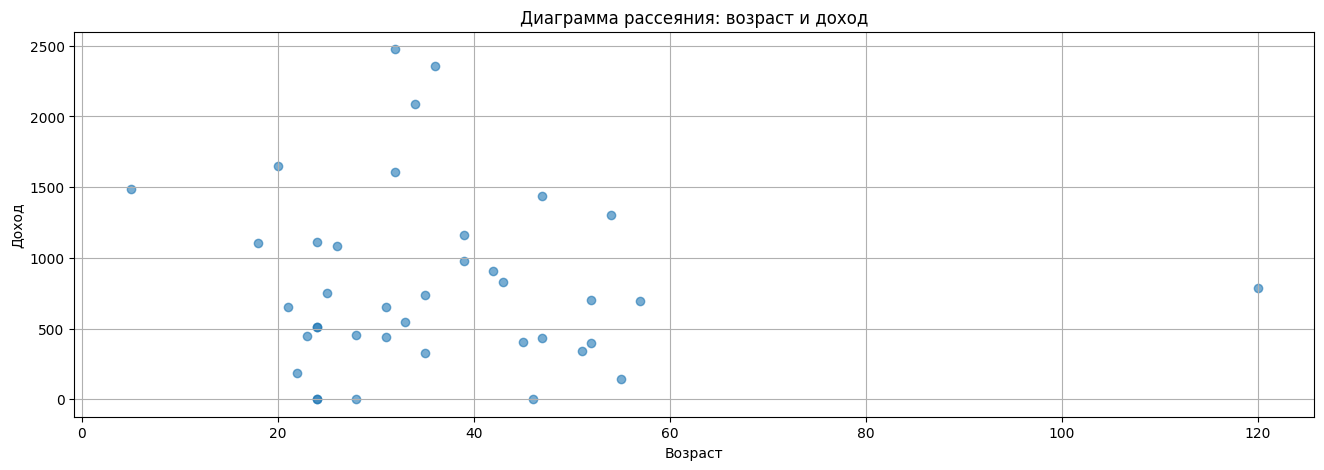

In [40]:
plt.figure(figsize=(16, 5))
plt.scatter(
    df["age"],
    df["revenue"],
    alpha=0.6
)
plt.title("Диаграмма рассеяния: возраст и доход")
plt.xlabel("Возраст")
plt.ylabel("Доход")
plt.grid()

plt.savefig("figures/scater_revenue_age.png")
plt.show()